# Time series analysis of Google Trends for "Fourier Transform"

## Prerequisites

In [ ]:
%pip install pytrends

In [1]:
from pytrends.request import TrendReq
import pandas as pd

## Get Google trends data

In [2]:
pytrends = TrendReq(hl='en-US', tz=360)

In [3]:
keywords = ['Fourier Transform']
pytrends.build_payload(keywords, cat=0, timeframe='all', geo='', gprop='')# today 5-y


In [4]:
trends_df=pytrends.interest_over_time()


/usr/local/python/3.12.1/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


some work required by the maintainers to future proof this.

<Axes: xlabel='date'>

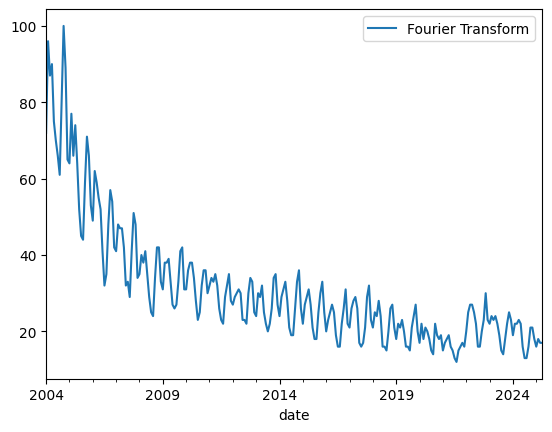

In [31]:
trends_df[~trends_df.isPartial].plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

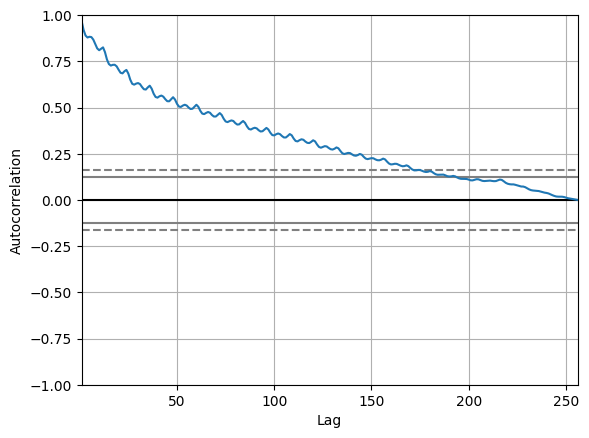

In [46]:
pd.plotting.autocorrelation_plot(trends_df[~trends_df.isPartial].dropna())

 Very hard to make the periodicity stand out against the decaying exponential trend.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

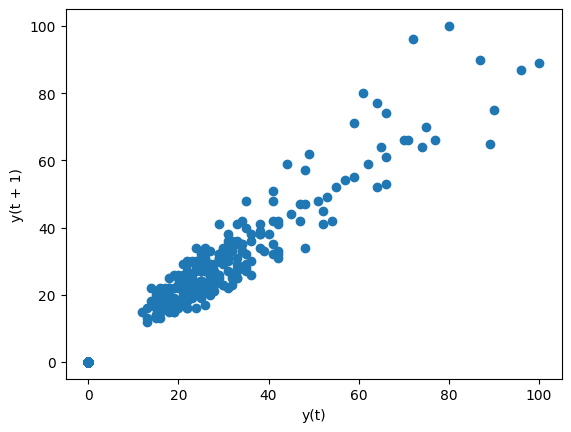

In [45]:
pd.plotting.lag_plot(trends_df[~trends_df.isPartial].dropna(),lag=1)

A lag of 1 is the classical use of the lag plot as a test for randomness, as described in the NIST Engineering statistics handbook. In this case it shows that the data is definitely not random

## Remove longer term decaying trend

<Axes: xlabel='date'>

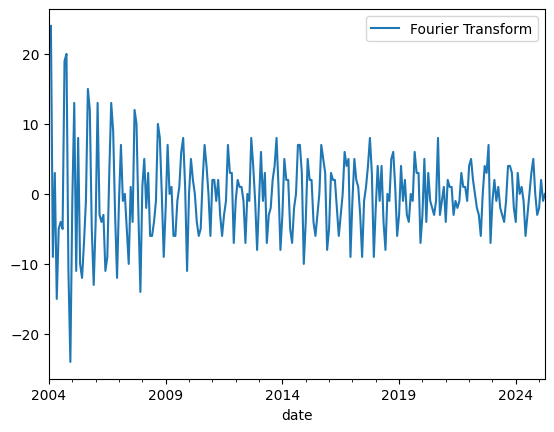

In [34]:
trends_df[~trends_df.isPartial].diff().plot()

The diff operator removes the slower decaying trend and keeps the short therm periodicity. This time the lag 1 plot does show randomness.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

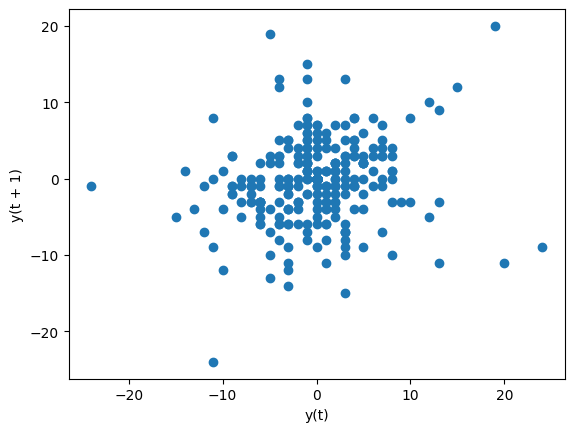

In [44]:
pd.plotting.lag_plot(trends_df[~trends_df.isPartial].diff().dropna(),lag=1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

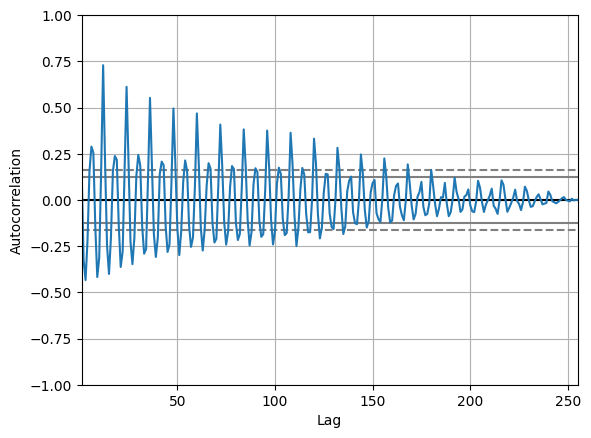

In [40]:
pd.plotting.autocorrelation_plot(trends_df[~trends_df.isPartial].diff().dropna())

Now the autocorrelation makes the periodicity much clearer. The data is monthly and there are 4 high peaks before 50, corresponding to 12, 24, 36 and 48, with smaller peaks half way between them.

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

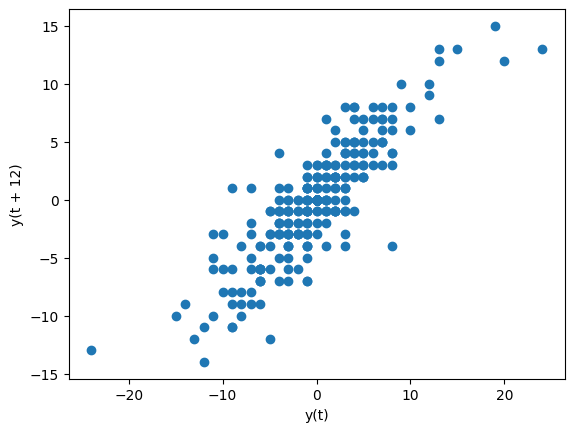

In [42]:
pd.plotting.lag_plot(trends_df[~trends_df.isPartial].diff().dropna(),lag=12)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

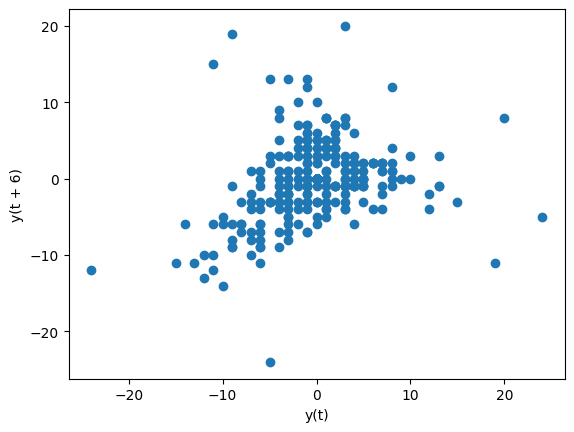

In [43]:
pd.plotting.lag_plot(trends_df[~trends_df.isPartial].diff().dropna(),lag=6)